# Detecção Facial

As imagens são compostas por fotos ou retratos artisticos singulares inserindo uma variedade de exemplos e avaliar o desempenho do método haar-like usado pelo modelo de classificação cascata.

In [ ]:
#@title Importação das bibliotecas
import os, cv2
import numpy as np
from google.colab.patches import cv2_imshow
cv2.__version__

'4.7.0'

In [ ]:
#@title Função de detecção de rostos
def face_img(path, dim):
  # Carrega arquivo e converte para tons de cinza
  img = cv2.imread(path)
  img = cv2.resize(img, dim) # Redimensionamento para melhor visualização
  original = img.copy() # Cópia para comparação
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Filtros para melhor compreensão facial
  filtred = cv2.equalizeHist(gray)

  # Criação do detector de faces
  cxml = '/content/drive/MyDrive/IA/Image Processing/Faces/frontalface.xml'
  cascade = cv2.CascadeClassifier(cxml)

  # Executa a detecção
  faces = cascade.detectMultiScale(
      filtred,
      scaleFactor = 1.2,
      minNeighbors = 7,
      minSize = (30, 30),
      flags = cv2.CASCADE_SCALE_IMAGE
  )

  # Desenha retangulos verdes na imagem original (colorida)
  for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 5)

  return original, img # Retorna a imagem original / imagem tratada / resultado

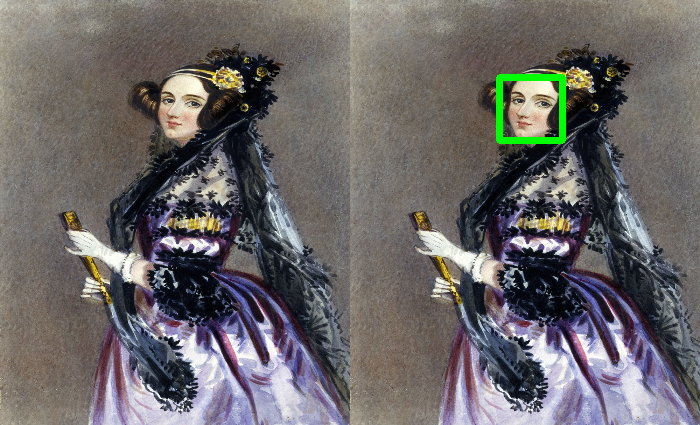

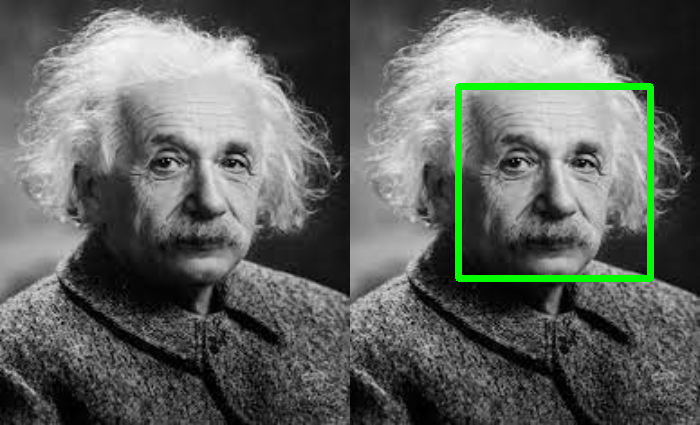

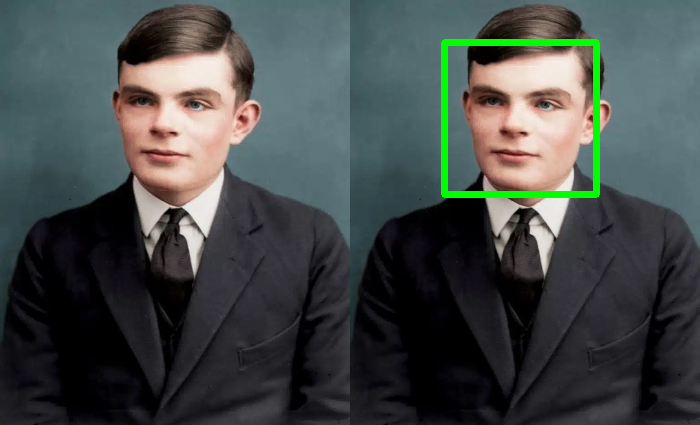

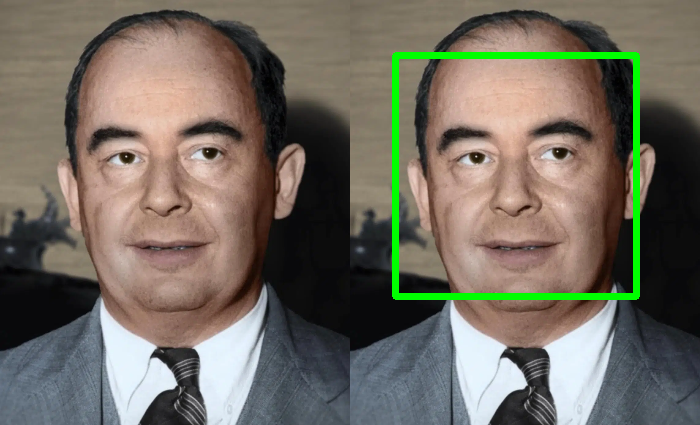

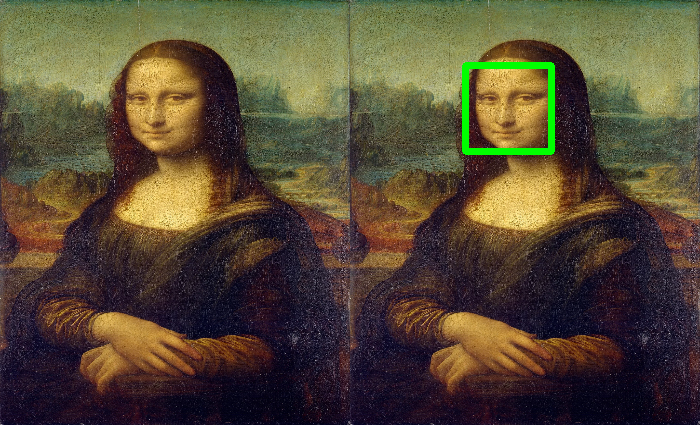

In [ ]:
#@title Execução em imagens simples
path = '/content/drive/MyDrive/IA/Image Processing/Faces'
files = os.listdir(path) # Percorrendo as imagens a partir de um diretório

dim = (350, 425) # Tamanho da imagem

for f in files:
  ext = f.split('.')[-1]
  if ext in ('jpg', 'png', 'jpeg'): # Verificando as extensões dos arquivos

    orig, face = face_img(path + '/' + f, dim) # Função de detecção

    result = np.vstack([np.hstack([orig, face])]) # Comparação das imagens
    cv2_imshow(result)

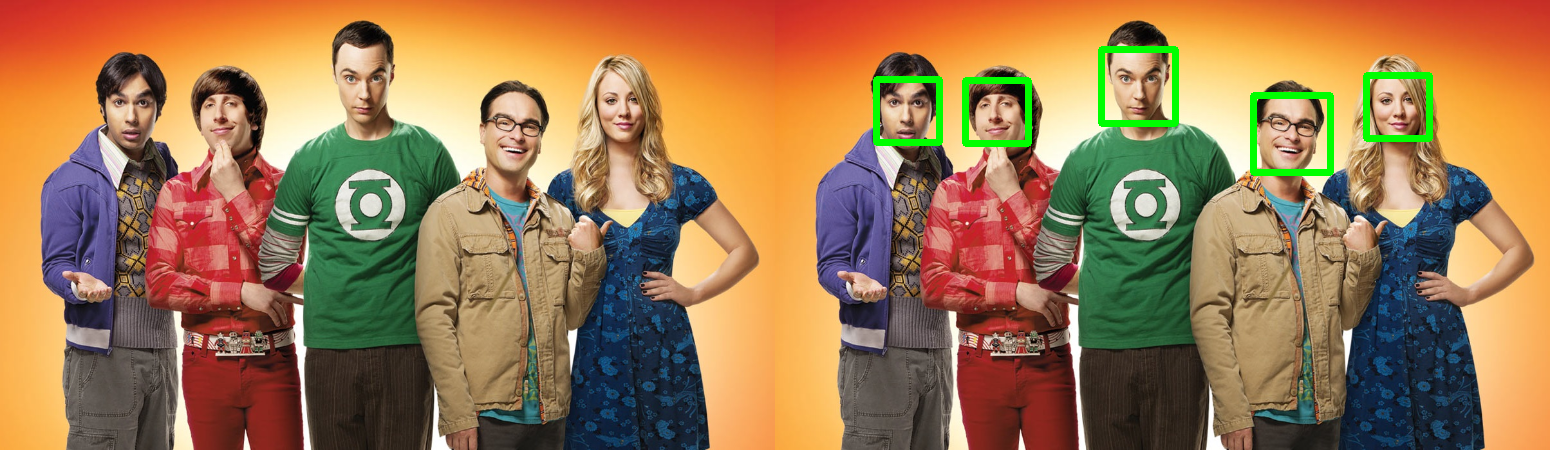

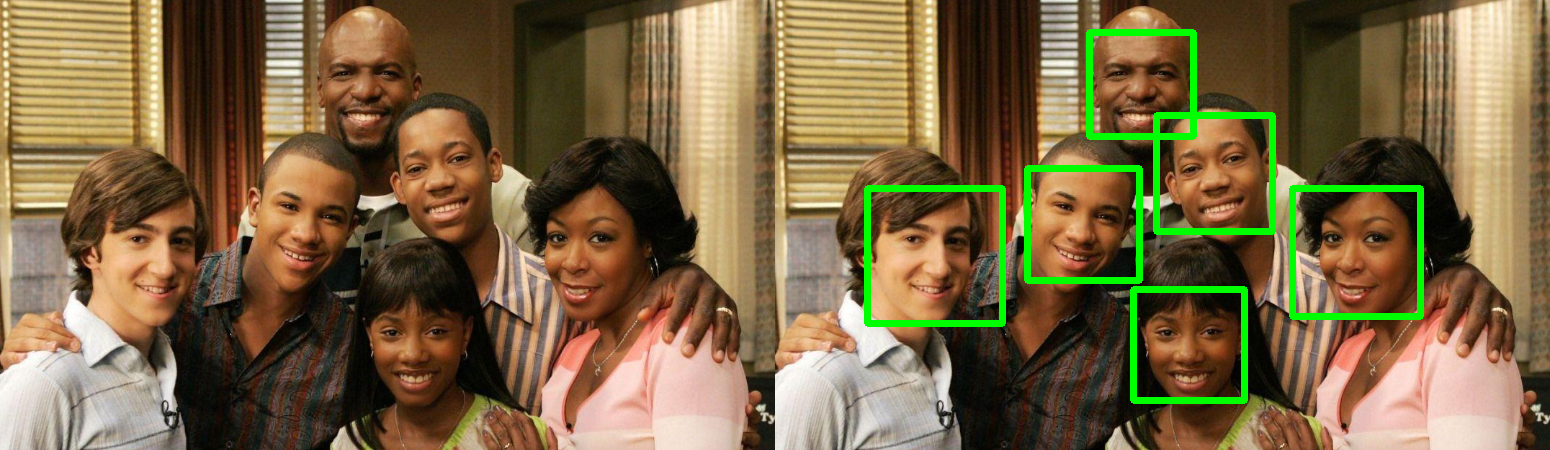

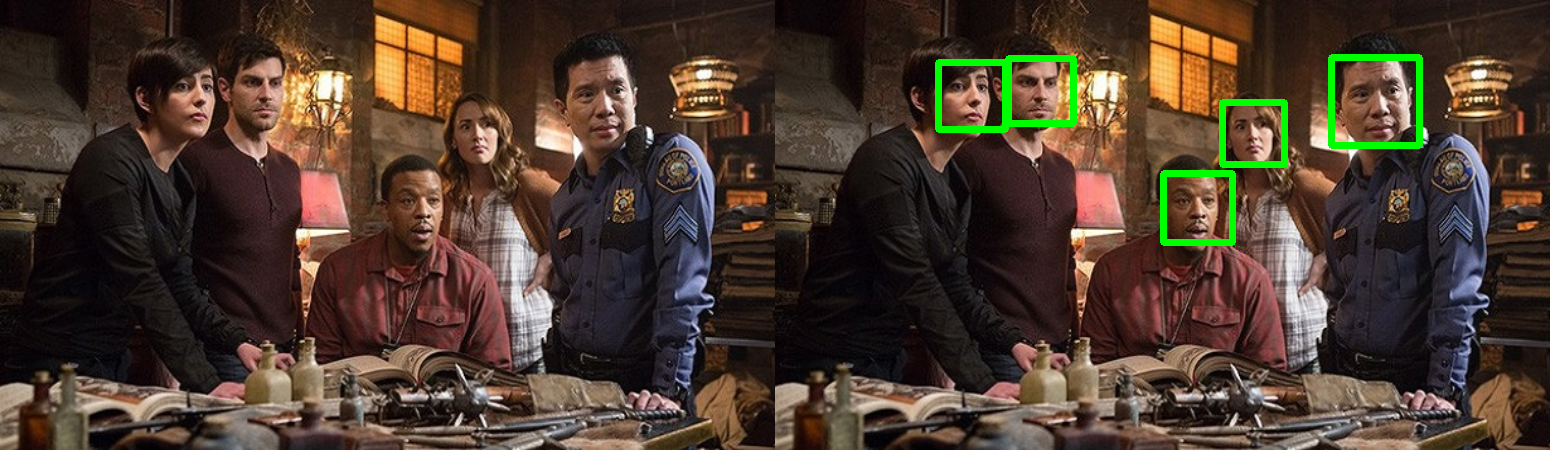

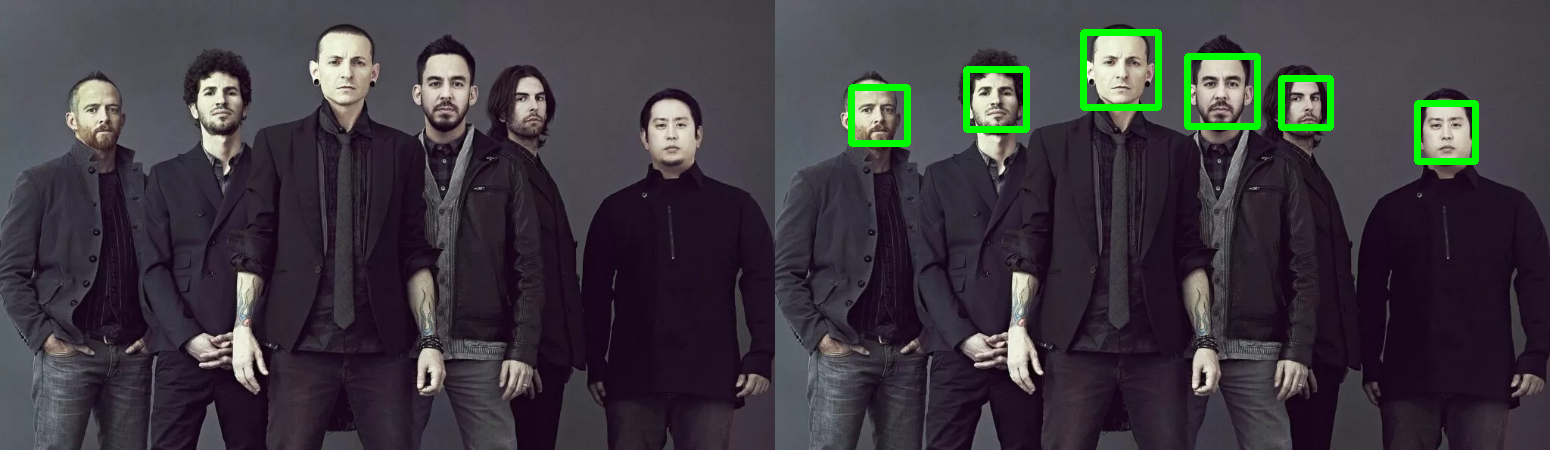

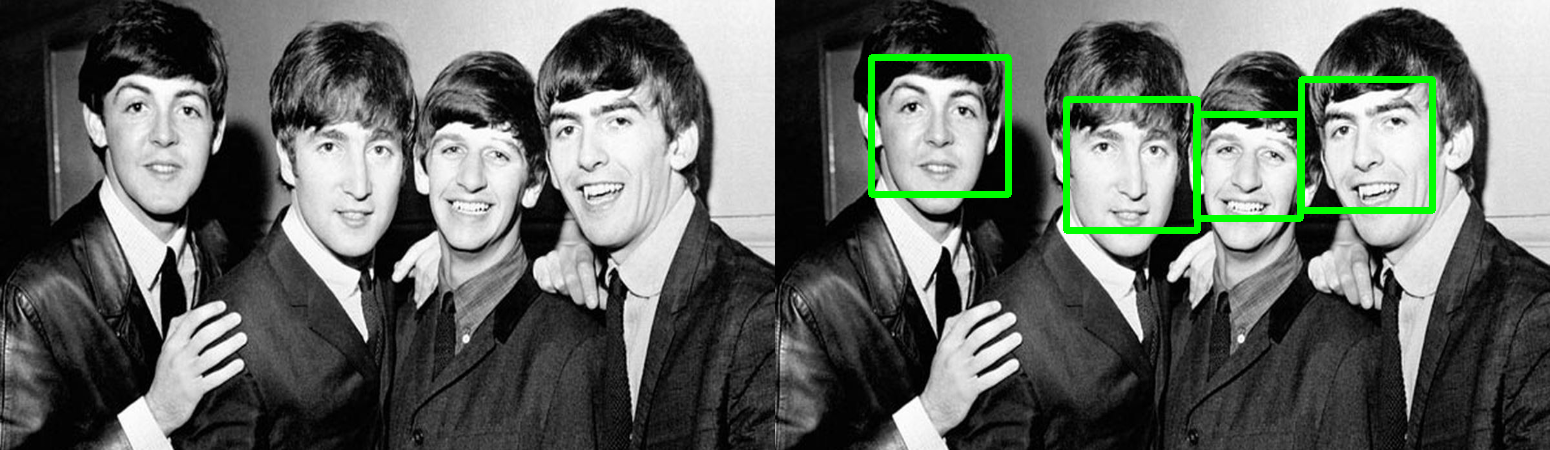

In [ ]:
#@title Execução em imagens compostas
path = '/content/drive/MyDrive/IA/Image Processing/Faces/Grupos'
files = os.listdir(path) # Percorrendo as imagens a partir de um diretório

dim = (775, 450) # Tamanho da imagem

for f in files:
  ext = f.split('.')[-1]
  if ext in ('jpg', 'png', 'jpeg'): # Verificando as extensões dos arquivos

    orig, face = face_img(path + '/' + f, dim) # Função de detecção

    result = np.vstack([np.hstack([orig, face])]) # Comparação das imagens
    cv2_imshow(result)